## Process Optimization of Photonic Curing for Perovskites on Willow Glass

### Batch 0 - Initial Sampling with Latin Hyper Cube

Zhe Liu, Ph.D. 
Northwestern Polytechnical University (NPU), Xi'an, P.R. China

In collaboration with Julia Hsu's team at UT Dallas

V1.0 - 2021.06.24
Install Anaconda and open this notebook in Jupyter

Requires Emukit package and its dependent packages (pyDOE, GPy, etc.)

    e.g. pip intall emukit (maybe, pip install pyDOE)

Experimental information:
LHS batch is 16 experimental conditions 

Samples: 4 pixel cells per substrate, and 2 duplicates per condition

Parameter resolution (Finest grid we are able to/are willing to tune). 
- Molar Concentration MAPbI3 - 0.1M
- Addition of CH2I2 - 20 uL
- PC voltage - no limit (willing to tune 1 V)
- PC pulse-length - no limit (willing to tune 0.1 ms)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

In [2]:
MAPbI_conc_min, MAPbI_conc_max, MAPbI_conc_step = [1.3, 1.6, 0.1]  # Unit: V 
''' the concentration range is actually from 1.3M to 1.6M. However, every time I set it to be 1.3 to 1.6. LHQ table
 give me 1.7M. I think this is related to get closest value''' 
### Give step a scaling factor of 0.1 to avoid numercial errors such as 1.7000002
MAPbI_conc_var = np.arange(MAPbI_conc_min, MAPbI_conc_max+MAPbI_conc_step*0.1, MAPbI_conc_step)
MAPbI_conc_num = len(MAPbI_conc_var)

CH2I2_conc_min, CH2I2_conc_max, CH2I2_conc_step = [0, 250, 50] ## Unit: uL
CH2I2_conc_var = np.arange(CH2I2_conc_min, CH2I2_conc_max+CH2I2_conc_step*0.1, CH2I2_conc_step)
CH2I2_conc_num = len(CH2I2_conc_var)

PC_volt_min, PC_volt_max, PC_volt_step = [200, 440, 1] ## Unit: V
PC_volt_var = np.arange(PC_volt_min, PC_volt_max+PC_volt_step*0.1, PC_volt_step) 
PC_volt_num = len(PC_volt_var)

PC_len_min, PC_len_max, PC_len_step = [1, 20, 0.1]  ## Unit: ms
PC_len_var = np.arange(PC_len_min, PC_len_max+PC_len_step*0.1, PC_len_step)
PC_len_num = len(PC_len_var)




var_array = [MAPbI_conc_var, CH2I2_conc_var, 
             PC_volt_var, PC_len_var]
x_labels = ['MAPbI Conc [M]', 
            'CH2I2 Conc [uL]', 
            'PC voltage [V]',  
            'PC length [ms]']

In [3]:
def x_normalizer(X, var_array):
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    x_norm = []
    for x in (X):
           x_norm.append([max_min_scaler(x[i], 
                         max(var_array[i]), 
                         min(var_array[i])) for i in range(len(x))])
            
    return x_norm

def x_denormalizer(x_norm, var_array):
    
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i], 
                             max(var_array[i]), 
                             min(var_array[i])) for i in range(len(x))])

    return x_original

def get_closest_value(given_value, array_list):
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(array_list, key=absolute_difference_function)
    return closest_value
    
def get_closest_array(suggested_x, var_list):
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

In [4]:
parameter_space = ParameterSpace([ContinuousParameter('MAPbI_conc', 0-1/(MAPbI_conc_num-1)/2, 1+1/(MAPbI_conc_num-1)/2),
                                 ContinuousParameter('CH2I2_conc', 0-1/(CH2I2_conc_num-1)/2, 1+1/(CH2I2_conc_num-1)/2),
                                 ContinuousParameter('PC_volt', 0-1/(PC_volt_num-1)/2, 1+1/(PC_volt_num-1)/2),
                                 ContinuousParameter('PC_len', 0-1/(PC_len_num-1)/2, 1+1/(PC_len_num-1)/2),
                                  ])


# parameter_space = ParameterSpace([DiscreteParameter('x1', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x2', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x3', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x4', np.linspace(0,1, 51)),
#                                  ])

In [8]:
x_init_original

array([[  1.6, 150. , 433. ,  18.3],
       [  1.5,  50. , 222. ,  17.1],
       [  1.5, 100. , 373. ,   6.3],
       [  1.3, 100. , 252. ,  11.1],
       [  1.6, 100. , 237. ,   9.9],
       [  1.5,  50. , 358. ,  12.3],
       [  1.4,   0. , 312. ,  15.9],
       [  1.5, 250. , 328. ,  19.5],
       [  1.6, 200. , 297. ,   2.7],
       [  1.4, 200. , 267. ,   7.5],
       [  1.6, 250. , 403. ,   1.5],
       [  1.3,   0. , 343. ,  13.5],
       [  1.4, 150. , 282. ,   8.7],
       [  1.3,   0. , 418. ,   3.9],
       [  1.3, 250. , 207. ,  14.7],
       [  1.4, 150. , 388. ,   5.1]])

In [5]:
np.random.seed(10)#to make sure the random results is reproducible 

design = LatinDesign(parameter_space)
x_init = design.get_samples(16)
x_init_original = get_closest_array(x_denormalizer(x_init, var_array),var_array)

df = pd.DataFrame(x_init_original, columns = x_labels)
df_cols = x_labels
df

,MAPbI Conc [M],CH2I2 Conc [uL],PC voltage [V],PC length [ms]
0,1.6,150.0,433.0,18.3
1,1.5,50.0,222.0,17.1
2,1.5,100.0,373.0,6.3
3,1.3,100.0,252.0,11.1
4,1.6,100.0,237.0,9.9
5,1.5,50.0,358.0,12.3
6,1.4,0.0,312.0,15.9
7,1.5,250.0,328.0,19.5
8,1.6,200.0,297.0,2.7
9,1.4,200.0,267.0,7.5


### 1D-projected Histogram

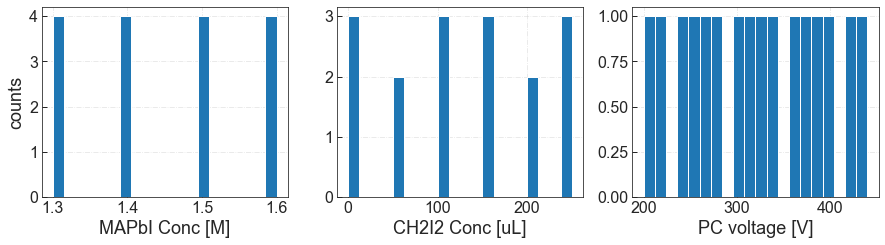

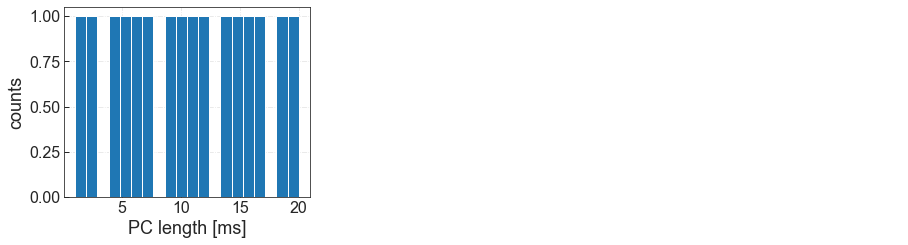

In [6]:
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})

n_col = 3 # num of columns per row in the figure
for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(15, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            max_ = max(var_array[n])
            min_ = min(var_array[n])
            axes[i].hist(df.iloc[:,n], bins = 20, range = (min_, max_))
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

### Paralell Plot 

In [7]:
df_parallel = pd.DataFrame(x_normalizer(x_init_original, var_array), columns = x_labels)

df_parallel['Efficiency [%]'] = np.zeros(len(df))

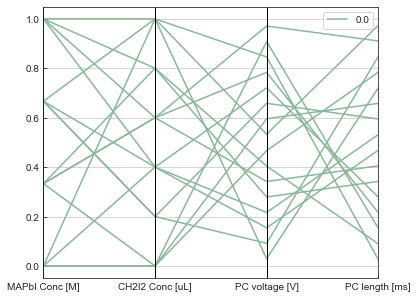

In [8]:
fig,axes = plt.subplots(1,1, figsize=(6,5))
pd.plotting.parallel_coordinates(df_parallel,'Efficiency [%]',ax=axes)
axes.set_ylim(-0.05,1.05)
axes.set_ylabel('',fontsize=20)

plt.show()

### tSNE Visualisation

In [9]:
np.random.seed(11) # to make sure the random results is reproducible 

design = RandomDesign(parameter_space)
x_sample = design.get_samples(5000)
x_sample_original = get_closest_array(x_denormalizer(x_sample, var_array),var_array)
X = np.append(x_sample,x_normalizer(x_init_original,var_array), axis = 0)

In [10]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)  # 

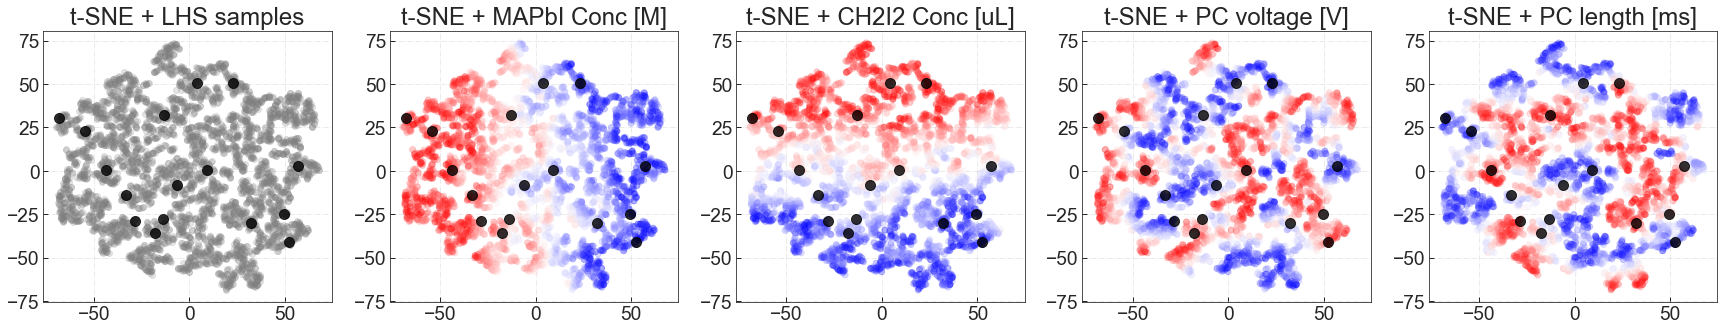

In [11]:
fig, axes = plt.subplots(1,5, figsize=(6*5, 5))
ax = axes[0]
ax.scatter(Y[:, 0], Y[:, 1],color = 'gray', alpha = 0.2)
ax.scatter(Y[-16:, 0], Y[-16:, 1], color = 'black', alpha = 0.8, s = 100)
ax.set_title("t-SNE + LHS samples", fontsize = 24)

ax = axes[1]
ax.scatter(Y[:, 0], Y[:, 1],c = X[:,0], cmap=plt.cm.bwr, alpha = 0.2)
ax.scatter(Y[-16:, 0], Y[-16:, 1],color = 'black', alpha = 0.8, s = 100)
ax.set_title("t-SNE + " + str(x_labels[0]), fontsize = 24)

ax = axes[2]
ax.scatter(Y[:, 0], Y[:, 1],c = X[:,1], cmap=plt.cm.bwr, alpha = 0.2)
ax.scatter(Y[-16:, 0], Y[-16:, 1],color = 'black', alpha = 0.8, s = 100)
ax.set_title("t-SNE + " + str(x_labels[1]), fontsize = 24)

ax = axes[3]
ax.scatter(Y[:, 0], Y[:, 1],c = X[:,2], cmap=plt.cm.bwr, alpha = 0.2)
ax.scatter(Y[-16:, 0], Y[-16:, 1],color = 'black', alpha = 0.8, s = 100)
ax.set_title("t-SNE + " + str(x_labels[2]), fontsize = 24)


ax = axes[4]
ax.scatter(Y[:, 0], Y[:, 1],c = X[:,3], cmap=plt.cm.bwr, alpha = 0.2)
ax.scatter(Y[-16:, 0], Y[-16:, 1],color = 'black', alpha = 0.8, s = 100)
ax.set_title("t-SNE + " + str(x_labels[3]), fontsize = 24)


for i in range(len(axes)):
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = 24*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')


plt.show()